## 文库重复性好坏

In [6]:
data1<-read.table("Repressed_peaks_bin_Counts",header=T,sep="\t")
head(data1)

,chr,start,end,output_a.bam,output_b.bam,output_c.bam,LNCap.input.bam
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr12_KI270904v1_alt,0,10000,0,0,0,0
2,chr12_KI270904v1_alt,10000,20000,0,0,0,0
3,chr12_KI270904v1_alt,20000,30000,0,0,0,0
4,chr12_KI270904v1_alt,30000,40000,0,0,0,0
5,chr12_KI270904v1_alt,40000,50000,0,0,0,0
6,chr12_KI270904v1_alt,50000,60000,0,0,0,0


In [7]:
options(repr.plot.width = 7, repr.plot.height = 7)
library(ggplot2)
library(ggpubr)
n1<-ggplot(data1, aes(x = output_a.bam,y = output_b.bam)) + 
  geom_point(shape = 19,colour = "dodgerblue3")+
  labs(y = "output_b",x = "output_a")+stat_smooth(method = lm,se = F,colour = "red")+
  theme(plot.title = element_text(hjust = 0.5,size = 15),axis.title.y.left = element_text(size = 13,colour = "black"),
             axis.title.x.bottom = element_text(size = 13,colour = "black"))+
             theme(axis.text.x.bottom = element_text(size = 12,colour = "black"))+
             theme(axis.text.y.left = element_text(size = 12,colour = "black",
                                              vjust = 0.5,hjust = 0.5,
                                              angle = 90))+theme_classic()+stat_cor(method = "pearson",digits = 4)

In [8]:

n2<-ggplot(data1, aes(x = output_a.bam,y = output_c.bam)) + 
  geom_point(shape = 19,colour = "dodgerblue3")+
  labs(y = "output_c",x = "output_a")+stat_smooth(method = lm,se = F,colour = "red")+
  theme(plot.title = element_text(hjust = 0.5,size = 15),axis.title.y.left = element_text(size = 13,colour = "black"),
             axis.title.x.bottom = element_text(size = 13,colour = "black"))+
             theme(axis.text.x.bottom = element_text(size = 12,colour = "black"))+
             theme(axis.text.y.left = element_text(size = 12,colour = "black",
                                              vjust = 0.5,hjust = 0.5,
                                              angle = 90))+theme_classic()+stat_cor(method = "pearson",digits = 4)

In [9]:

n3<-ggplot(data1, aes(x = output_b.bam,y = output_c.bam)) + 
  geom_point(shape = 19,colour = "dodgerblue3")+
  labs(y = "output_c",x = "output_b")+stat_smooth(method = lm,se = F,colour = "red")+
  theme(plot.title = element_text(hjust = 0.5,size = 15),axis.title.y.left = element_text(size = 13,colour = "black"),
             axis.title.x.bottom = element_text(size = 13,colour = "black"))+
             theme(axis.text.x.bottom = element_text(size = 12,colour = "black"))+
             theme(axis.text.y.left = element_text(size = 12,colour = "black",
                                              vjust = 0.5,hjust = 0.5,
                                              angle = 90))+theme_classic()+stat_cor(method = "pearson",digits = 4)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



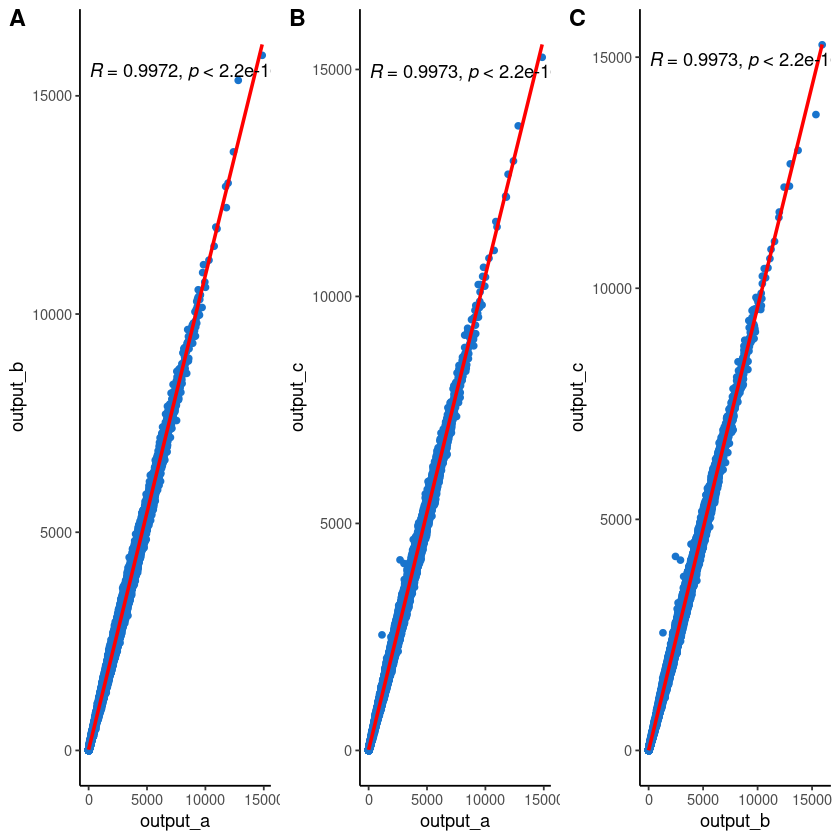

In [10]:
p1<-ggarrange(n1,n2,n3,ncol=3,nrow=1,labels=c("A","B","C"))
p1
ggsave("reads_count_cor.png", p1, width = 14, height = 7)

## 不同文库沉默子活性相关性

In [12]:
data2<-read.table("Repressed_peaks_Counts",header=T,sep="\t")

data2$LNCap.input.bam<-data2$LNCap.input.bam/323773633*1000000
data2$output_a.bam<-data2$output_a.bam/312125466*1000000
data2$output_b.bam<-data2$output_b.bam/342138450*1000000
data2$output_c.bam<-data2$output_c.bam/328586220*1000000


data2$output_a_FC<-data2$LNCap.input.bam/data2$output_a.bam

data2$output_b_FC<-data2$LNCap.input.bam/data2$output_b.bam

data2$output_c_FC<-data2$LNCap.input.bam/data2$output_c.bam

head(data2)

,chr,start,end,output_a.bam,output_b.bam,output_c.bam,LNCap.input.bam,output_a_FC,output_b_FC,output_c_FC
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr6,141503729,141503879,0.27553023,0.21628671,0.20694721,0.33356638,1.2106345,1.5422417,1.6118429
2,chr6,141506375,141506425,0.14737663,0.14029408,0.17042711,0.24708621,1.6765630,1.7612019,1.4498058
3,chr6,141507989,141508089,0.22426879,0.23966906,0.22520725,0.26561768,1.1843720,1.1082685,1.1794366
4,chr6,141511051,141511201,0.05766912,0.06430145,0.06086683,0.10501164,1.8209337,1.6331145,1.7252689
5,chr6,141518171,141518221,0.08329984,0.09352939,0.09130024,0.07412586,0.8898681,0.7925409,0.8118912
6,chr6,141520001,141520051,0.03203840,0.01753676,0.02434673,0.04324009,1.3496332,2.4656827,1.7760121


In [13]:
m1<-ggplot(data2, aes(x = output_a_FC,y = output_b_FC)) + 
  geom_point(shape = 19,colour = "dodgerblue3")+
  labs(y = "output_b_FC",x = "output_a_FC")+stat_smooth(method = lm,se = F,colour = "red")+
  theme(plot.title = element_text(hjust = 0.5,size = 15),axis.title.y.left = element_text(size = 13,colour = "black"),
             axis.title.x.bottom = element_text(size = 13,colour = "black"))+
             theme(axis.text.x.bottom = element_text(size = 12,colour = "black"))+
             theme(axis.text.y.left = element_text(size = 12,colour = "black",
                                              vjust = 0.5,hjust = 0.5,
                                              angle = 90))+theme_classic()+stat_cor(method = "pearson",digits = 4)


In [14]:
m2<-ggplot(data2, aes(x = output_a_FC,y = output_c_FC)) + 
  geom_point(shape = 19,colour = "dodgerblue3")+
  labs(y = "output_c_FC",x = "output_a_FC")+stat_smooth(method = lm,se = F,colour = "red")+
  theme(plot.title = element_text(hjust = 0.5,size = 15),axis.title.y.left = element_text(size = 13,colour = "black"),
             axis.title.x.bottom = element_text(size = 13,colour = "black"))+
             theme(axis.text.x.bottom = element_text(size = 12,colour = "black"))+
             theme(axis.text.y.left = element_text(size = 12,colour = "black",
                                              vjust = 0.5,hjust = 0.5,
                                              angle = 90))+theme_classic()+stat_cor(method = "pearson",digits = 4)


In [15]:
m3<-ggplot(data2, aes(x = output_b_FC,y = output_c_FC)) + 
  geom_point(shape = 19,colour = "dodgerblue3")+
  labs(y = "output_b_FC",x = "output_a_FC")+stat_smooth(method = lm,se = F,colour = "red")+
  theme(plot.title = element_text(hjust = 0.5,size = 15),axis.title.y.left = element_text(size = 13,colour = "black"),
             axis.title.x.bottom = element_text(size = 13,colour = "black"))+
             theme(axis.text.x.bottom = element_text(size = 12,colour = "black"))+
             theme(axis.text.y.left = element_text(size = 12,colour = "black",
                                              vjust = 0.5,hjust = 0.5,
                                              angle = 90))+theme_classic()+stat_cor(method = "pearson",digits = 4)

In [16]:
p2<-ggarrange(m1,m2,m3,ncol=3,nrow=1,labels=c("A","B","C"))

ggsave("Fold_change_cor.png", p2, width = 14, height = 7)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 25 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 25 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 21 rows containing non-finite values (stat_cor).”


## 沉默子活性分布

In [17]:
head(data2)

,chr,start,end,output_a.bam,output_b.bam,output_c.bam,LNCap.input.bam,output_a_FC,output_b_FC,output_c_FC
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr6,141503729,141503879,0.27553023,0.21628671,0.20694721,0.33356638,1.2106345,1.5422417,1.6118429
2,chr6,141506375,141506425,0.14737663,0.14029408,0.17042711,0.24708621,1.6765630,1.7612019,1.4498058
3,chr6,141507989,141508089,0.22426879,0.23966906,0.22520725,0.26561768,1.1843720,1.1082685,1.1794366
4,chr6,141511051,141511201,0.05766912,0.06430145,0.06086683,0.10501164,1.8209337,1.6331145,1.7252689
5,chr6,141518171,141518221,0.08329984,0.09352939,0.09130024,0.07412586,0.8898681,0.7925409,0.8118912
6,chr6,141520001,141520051,0.03203840,0.01753676,0.02434673,0.04324009,1.3496332,2.4656827,1.7760121


In [18]:
data2$mean_FC<-(data2$output_a_FC+data2$output_b_FC+data2$output_c_FC)/3
data2$mean_FC<-round(data2$mean_FC,1)
head(data2)
data2<-data2[c(1,2,3,11)]
write.table(data2,"/data/wangchao/all_starr-seq/Analysis/K562/03_silencer_ATAC/silencer_FC.txt",sep="\t",quote=FALSE,row.names = F)

,chr,start,end,output_a.bam,output_b.bam,output_c.bam,LNCap.input.bam,output_a_FC,output_b_FC,output_c_FC,mean_FC
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr6,141503729,141503879,0.27553023,0.21628671,0.20694721,0.33356638,1.2106345,1.5422417,1.6118429,1.5
2,chr6,141506375,141506425,0.14737663,0.14029408,0.17042711,0.24708621,1.6765630,1.7612019,1.4498058,1.6
3,chr6,141507989,141508089,0.22426879,0.23966906,0.22520725,0.26561768,1.1843720,1.1082685,1.1794366,1.2
4,chr6,141511051,141511201,0.05766912,0.06430145,0.06086683,0.10501164,1.8209337,1.6331145,1.7252689,1.7
5,chr6,141518171,141518221,0.08329984,0.09352939,0.09130024,0.07412586,0.8898681,0.7925409,0.8118912,0.8
6,chr6,141520001,141520051,0.03203840,0.01753676,0.02434673,0.04324009,1.3496332,2.4656827,1.7760121,1.9


Warning message:
“Removed 114 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


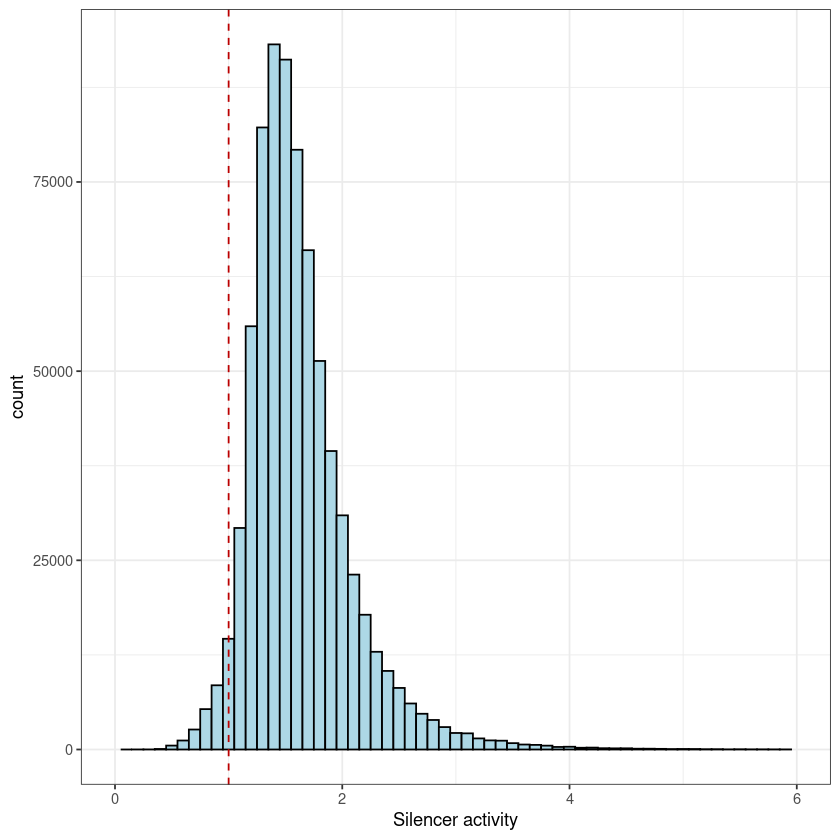

In [19]:
ggplot(data2, aes(x = mean_FC)) +
  # 直方图函数：binwidth设置组距
  geom_histogram(binwidth = 0.1, fill = "lightblue", colour = "black")+
geom_vline(aes(xintercept=1), colour="#BB0000", linetype="dashed")+xlim(0,6)+
xlab("Silencer activity")+ theme(axis.text.x=element_text(angle=15,hjust = 1,colour="black",family="Times",size=20),
        axis.text.y=element_text(family="Times",size=16,face="plain"), 
        axis.title.y=element_text(family="Times",size = 20,face="plain"), 
        axis.title.x=element_text(family="Times",size = 20,face="plain"), 
       legend.text=element_text(face="italic", family="Times", colour="black",  
                                 size=16),
        legend.title=element_text(face="italic", family="Times", colour="black", 
                                  size=18))+theme_bw()